<a href="https://colab.research.google.com/github/lunaris29/Lunaris29/blob/main/MLOps_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install PyCaret**

In [1]:
!pip install pycaret

**MBTI Type Dataset Fetch via KaggleHub**

In [2]:
import kagglehub
import pandas as pd
import re
from pathlib import Path

In [3]:
path = kagglehub.dataset_download("datasnaek/mbti-type")
path = Path(path)

100%|██████████| 24.4M/24.4M [00:00<00:00, 155MB/s]

Extracting files...


**Dataset Preprocessing**

In [4]:
print(list(path.rglob("*.csv"))[0])

/root/.cache/kagglehub/datasets/datasnaek/mbti-type/versions/1/mbti_1.csv


In [5]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/datasnaek/mbti-type/versions/1/mbti_1.csv")
print(df.head())
print(df['type'].value_counts())

   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...
type
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: count, dtype: int64


In [6]:
def clean_step1(text):
    text = text.replace("|||", " ")
    text = text.replace("\n", " ").replace("\t", " ").strip()
    return text

df['clean_posts'] = df['posts'].apply(clean_step1)

In [7]:
def clean_step2(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

df['clean_posts'] = df['clean_posts'].apply(clean_step2)

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_step3(text):
    words = text.split()
    filtered = [word for word in words if word not in stop_words]
    return ' '.join(filtered)

df['clean_posts'] = df['clean_posts'].apply(clean_step3)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def clean_step4(text):
    words = text.split()
    lemmatized = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized)

df['clean_posts'] = df['clean_posts'].apply(clean_step4)

[nltk_data] Downloading package wordnet to /root/nltk_data...


**Feature Extrction**

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = tfidf.fit_transform(df['clean_posts'])

**Label Encoding**

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['type'])
print(le.classes_)
print(y[:10])

['ENFJ' 'ENFP' 'ENTJ' 'ENTP' 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP'
 'INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP']
[ 8  3 11 10  2 10  8 10  8 11]


**Auto ML**

In [12]:
X_dense = X.toarray()

df_ml = pd.DataFrame(X_dense)
df_ml['target'] = y

In [13]:
from pycaret.classification import *

clf = setup(data=df_ml, target='target', session_id=42, fold=5, verbose=False)

In [14]:
best_models = compare_models(n_select=3, exclude=['gbc', 'xgboost', 'lightgbm', 'catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.6431,0.0000,0.6431,0.6445,0.6342,0.5847,0.5862,9.7900
ridge,Ridge Classifier,0.6425,0.0000,0.6425,0.6461,0.6290,0.5816,0.5838,4.5780
lr,Logistic Regression,0.6276,0.0000,0.6276,0.6411,0.5942,0.5587,0.5650,13.6760
rf,Random Forest Classifier,0.5647,0.8895,0.5647,0.5731,0.5135,0.4772,0.4901,10.6280
et,Extra Trees Classifier,0.5051,0.8707,0.5051,0.5290,0.4485,0.4004,0.4205,11.1760
dt,Decision Tree Classifier,0.4580,0.6917,0.4580,0.4573,0.4566,0.3773,0.3775,8.1880
knn,K Neighbors Classifier,0.3842,0.7276,0.3842,0.4498,0.3598,0.2698,0.2838,6.0940
nb,Naive Bayes,0.3188,0.6628,0.3188,0.3003,0.3076,0.2108,0.2112,3.3960
ada,Ada Boost Classifier,0.2831,0.0000,0.2831,0.2039,0.2063,0.1478,0.1727,18.6840
dummy,Dummy Classifier,0.2111,0.5000,0.2111,0.0446,0.0736,0.0000,0.0000,1.6720


Processing:   0%|          | 0/51 [00:00<?, ?it/s]

**Visualization**

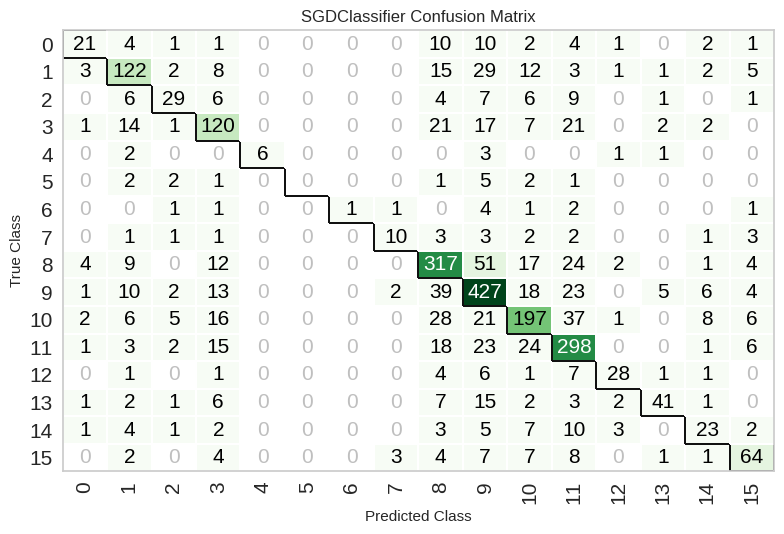

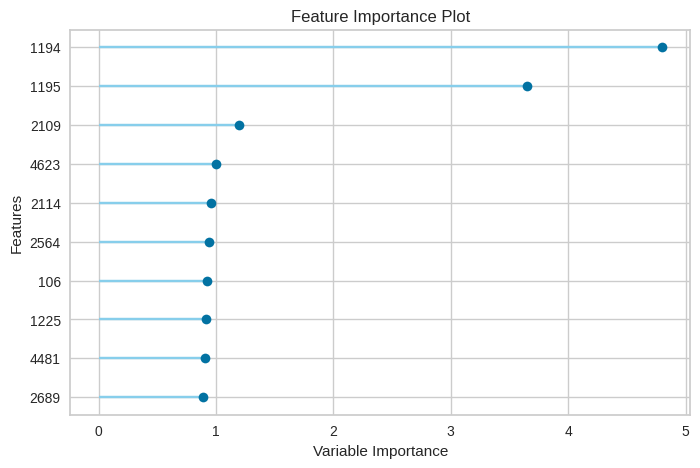

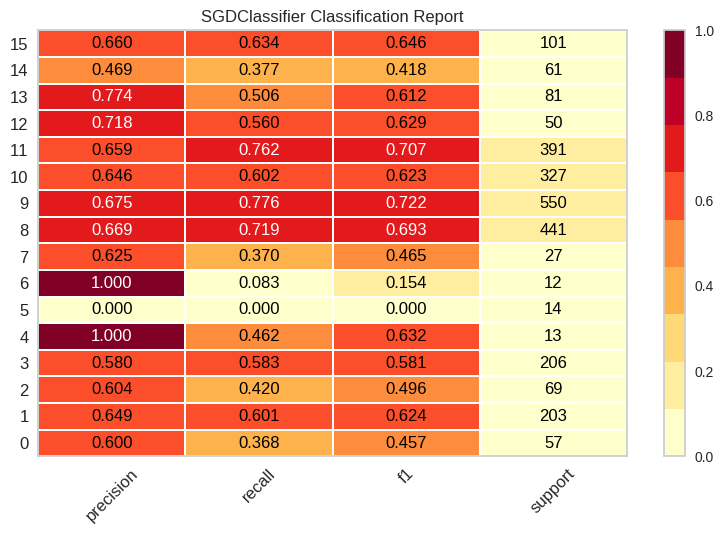

In [17]:
plot_model(best_models[0], plot='confusion_matrix')
plot_model(best_models[0], plot='feature')
plot_model(best_models[0], plot='class_report')

In [15]:
evaluate_model(best_models[0])
predict_model(best_models[0])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.6546,0,0.6546,0.6522,0.6469,0.5990,0.5999


,0,1,2,3,4,5,6,7,8,9,...,4992,4993,4994,4995,4996,4997,4998,4999,target,prediction_label
4511,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,2,2
744,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,15,9
7533,0.000000,0.000000,0.0,0.0,0.0,0.0,0.042742,0.053959,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.049476,0.0,0.000000,11,11
876,0.000000,0.022471,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.043746,9,9
701,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851,0.032796,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,9,9
1625,0.000000,0.021445,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.024742,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0,15
6965,0.000000,0.030046,0.0,0.0,0.0,0.0,0.055418,0.000000,0.0,0.0,...,0.069330,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,3,3
1,0.000000,0.025650,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,3,3


In [21]:
for i, model in enumerate(best_models):
    print(f"Model {i+1}: {model.__class__.__name__}")
    predictions = predict_model(model)

    result = pull()
    print("Accuracy:", result.loc[0, 'Accuracy'])

Model 1: SGDClassifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.6546,0,0.6546,0.6522,0.6469,0.5990,0.5999


Accuracy: 0.6546
Model 2: RidgeClassifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.6396,0,0.6396,0.6472,0.6286,0.5784,0.5805


Accuracy: 0.6396
Model 3: LogisticRegression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6393,0.9255,0.6393,0.6410,0.6088,0.5735,0.5788


Accuracy: 0.6393
